In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.regularizers import l2
import matplotlib.pyplot as plt
import numpy as np
import os

2024-03-29 17:33:22.315305: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/hanafahim/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
data = os.path.abspath('veggie_heap_training')
test = os.path.abspath('veggie_heap_testing')
#Otherwise, it yields a tuple (images, labels), where images has shape (batch_size, image_size[0], image_size[1], num_channels), and labels follows the format described below.

In [3]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data,
  validation_split=0.2,
  subset="validation",
  labels='inferred',
  seed=42,
  image_size=(256, 256),
  batch_size=32,
  shuffle=True
  )
train_ds = tf.keras.utils.image_dataset_from_directory(
  data, 
  validation_split=0.2,
  subset='training',
  labels='inferred',
  seed=42,
  image_size=(256, 256),
  batch_size=32,
  shuffle=True
  )
test_ds=tf.keras.utils.image_dataset_from_directory(
  test, 
  labels='inferred',
  seed=42,
  image_size=(256, 256),
  batch_size=32,
  shuffle=True
  )


Found 9835 files belonging to 12 classes.
Using 1967 files for validation.
Found 9835 files belonging to 12 classes.
Using 7868 files for training.
Found 2424 files belonging to 12 classes.


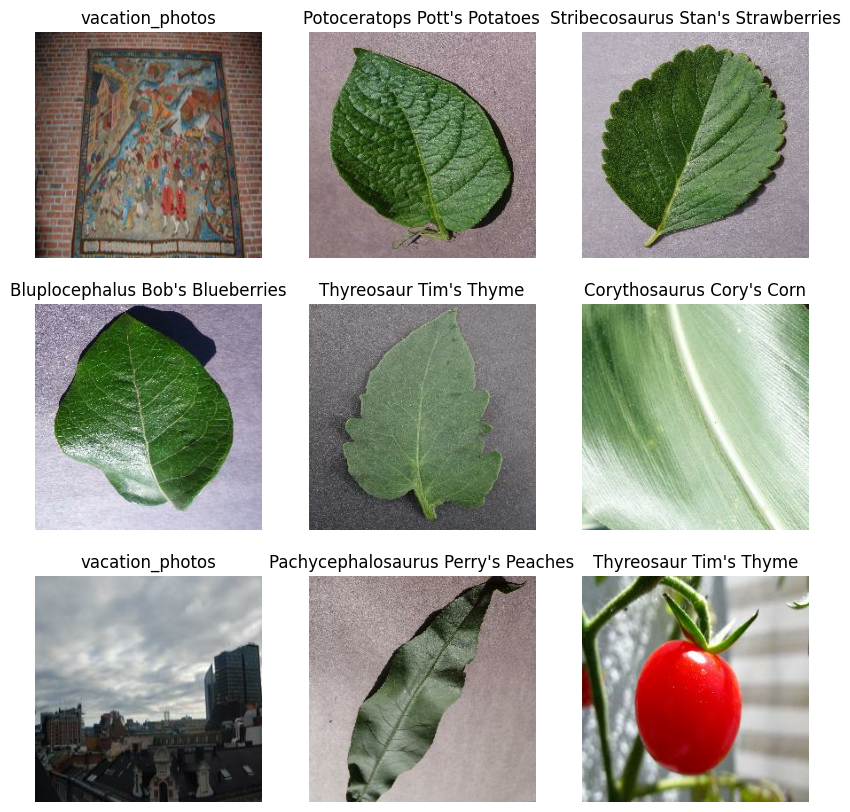

In [4]:
image_batch, label_batch = next(iter(train_ds))
class_names = train_ds.class_names


plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  label = label_batch[i]
  plt.title(class_names[label])
  plt.axis("off")

In [5]:
def convolutional_model(input_shape):
    input_img = tf.keras.Input(shape=input_shape)
  
    Z1 = layers.Conv2D(16, 3, activation='linear', padding="same", strides=1,kernel_regularizer = l2(0.01))(input_img)
    A1 = layers.ReLU()(Z1)
    P1 = layers.MaxPool2D(pool_size=(2, 2))(A1)
    Z2 = layers.Conv2D(16, 3, activation='linear', padding="same", strides=1,kernel_regularizer =l2(0.01))(P1)
    A2 = layers.ReLU()(Z2)
    P2 = layers.MaxPool2D(pool_size=(2, 2))(A2)
    Z3 = layers.Conv2D(16, 3, activation='linear', padding="same", strides=1,kernel_regularizer =l2(0.01))(P2)
    A3 = layers.ReLU()(Z3)
    P3 = layers.MaxPool2D(pool_size=(2, 2))(A3)
    F = layers.Flatten()(P3)
    F=layers.Dropout(0.2)(F)
    outputs = layers.Dense(12, activation='softmax')(F)
    

    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model


In [9]:
conv_model = convolutional_model((256, 256, 3))
conv_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
history = conv_model.fit(train_ds, epochs=5, validation_data=val_ds)


Epoch 1/5
246/246 [==============================] - 141s 569ms/step - loss: 3.1333 - accuracy: 0.6014 - val_loss: 0.8126 - val_accuracy: 0.8388
Epoch 2/5
246/246 [==============================] - 141s 572ms/step - loss: 0.7064 - accuracy: 0.8667 - val_loss: 0.8962 - val_accuracy: 0.8114
Epoch 3/5
246/246 [==============================] - 141s 571ms/step - loss: 0.4522 - accuracy: 0.9349 - val_loss: 0.6713 - val_accuracy: 0.8821
Epoch 4/5
246/246 [==============================] - 141s 574ms/step - loss: 0.3709 - accuracy: 0.9574 - val_loss: 0.9175 - val_accuracy: 0.8216
Epoch 5/5
246/246 [==============================] - 140s 570ms/step - loss: 0.3415 - accuracy: 0.9634 - val_loss: 0.6385 - val_accuracy: 0.8958


In [10]:
loss, accuracy = conv_model.evaluate(
    test_ds
)


76/76 [==============================] - 14s 183ms/step - loss: 2.7741 - accuracy: 0.5846
